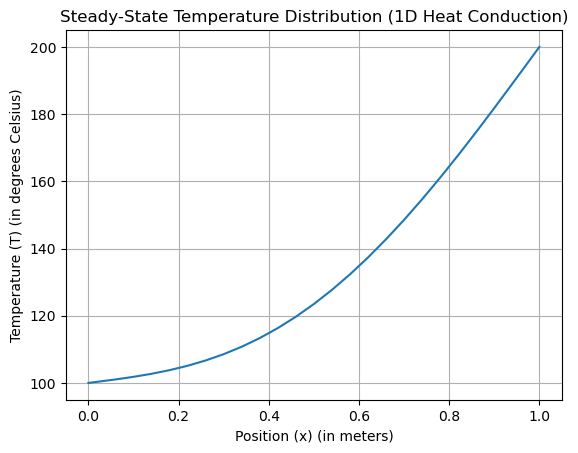

In [1]:
#1D steady state

import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
L = 1.0        # Length of the rod (in meters)
Nx = 50        # Number of spatial grid points
T_left = 100   # Temperature at the left boundary (in degrees Celsius)
T_right = 200  # Temperature at the right boundary (in degrees Celsius)

# Discretize the spatial domain
dx = L / Nx
x = np.linspace(0, L, Nx + 1)

# Initialize the temperature field
T = np.zeros(Nx + 1)

# Set boundary conditions
T[0] = T_left
T[Nx] = T_right

# Define the heat source or sink term (q(x)) (in watts per meter)
q = np.zeros(Nx + 1)

# Define the thermal conductivity (k) - constant (in watts per meter per degree Celsius)
k = 1.0

# Define the convergence criterion and maximum iterations for the solver
max_iterations = 1000
tolerance = 1e-5

# Finite Difference Solver
for iteration in range(max_iterations):
    T_new = np.copy(T)
    for i in range(1, Nx):
        T_new[i] = 0.5 * (T[i - 1] + T[i + 1] + dx**2 * q[i] / k)
    max_error = np.max(np.abs(T_new - T))
    T = np.copy(T_new)
    if max_error < tolerance:
        break

# Plot the temperature distribution
plt.plot(x, T)
plt.xlabel('Position (x) (in meters)')
plt.ylabel('Temperature (T) (in degrees Celsius)')
plt.title('Steady-State Temperature Distribution (1D Heat Conduction)')
plt.grid()
plt.show()


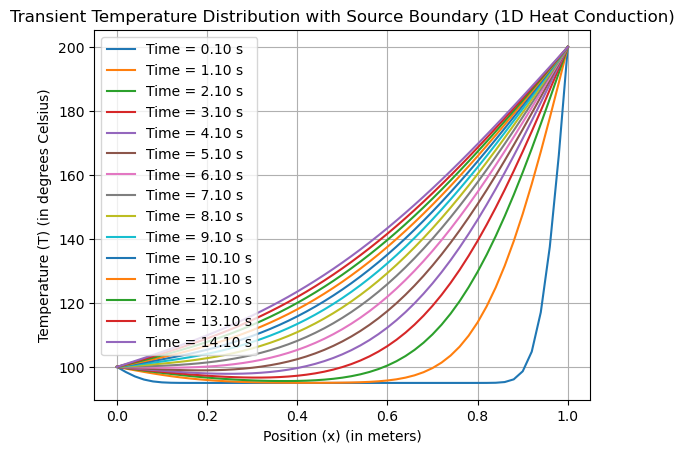

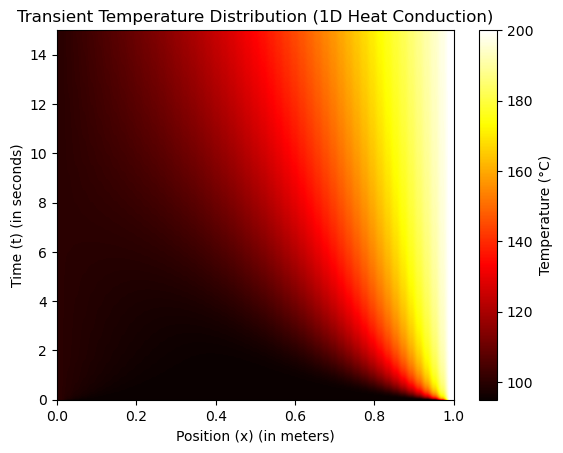

(1500, 51)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
L = 1.0        # Length of the rod (in meters)
Nx = 50        # Number of spatial grid points
T_left = 100   # Initial temperature at the left boundary (in degrees Celsius)
q_right = 100.0 # Heat source/sink at the right boundary (in watts per meter)
T_right = 200
T_Init = 95
# Discretize the spatial domain
dx = L / Nx
x = np.linspace(0, L, Nx + 1)
alpha = 0.01  # Thermal diffusivity
# Initialize the temperature field
T = np.full((Nx + 1,), T_Init, dtype=np.float64) #np.zeros(Nx + 1)
T[0] = T_left
T[Nx] = T_right

# Define the heat source or sink term (q(x)) (in watts per meter)
q = np.zeros(Nx + 1)
#q[Nx] = q_right

# Define the thermal conductivity (k) - constant (in watts per meter per degree Celsius)
k = 1.0

# Time parameters
t_max = 15.0      # Total simulation time (in seconds)
Nt = 1500        # Number of time steps
dt = t_max / Nt  # Time step size (in seconds)

# Create an array to store temperature at each time step
T_history = []

T_prev = np.copy(T)

# Transient Solver
for n in range(Nt):
    T_new = np.copy(T)
    for i in range(1, Nx):
        #T_new[i] = T_prev[i] + (k * dt / dx**2) * (T[i - 1] - 2 * T[i] + T[i + 1]) + (q[i] * dt / k)
        T_new[i] = T[i] + alpha * (T[i - 1] - 2 * T[i] + T[i + 1]) / (dx**2) * dt
    T = np.copy(T_new)
    T_prev = np.copy(T_new)
    T_history.append(T.copy())

T_history_fdm = np.array(T_history)

# Plot the temperature history at specified time intervals
time_intervals_to_plot = np.arange(10, Nt, 100) #[0, 10, 20, 30, 40, 50, 60]
for n in time_intervals_to_plot:
    plt.plot(x, T_history_fdm[n], label=f'Time = {n * dt:.2f} s')

plt.xlabel('Position (x) (in meters)')
plt.ylabel('Temperature (T) (in degrees Celsius)')
plt.title('Transient Temperature Distribution with Source Boundary (1D Heat Conduction)')
plt.legend()
plt.grid()
plt.show()



plt.clf()
plt.imshow(T_history_fdm, cmap='hot', extent=[0, L, 0, t_max], aspect='auto', origin='lower')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Position (x) (in meters)')
plt.ylabel('Time (t) (in seconds)')
plt.title('Transient Temperature Distribution (1D Heat Conduction)')
plt.show()

print(T_history_fdm.shape)

2023-11-21 15:19:07.904717: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-21 15:19:07.905971: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 15:19:07.930487: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 15:19:07.930948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 15:19:08.452389: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

1/1 [==============================] - 0s 48ms/step


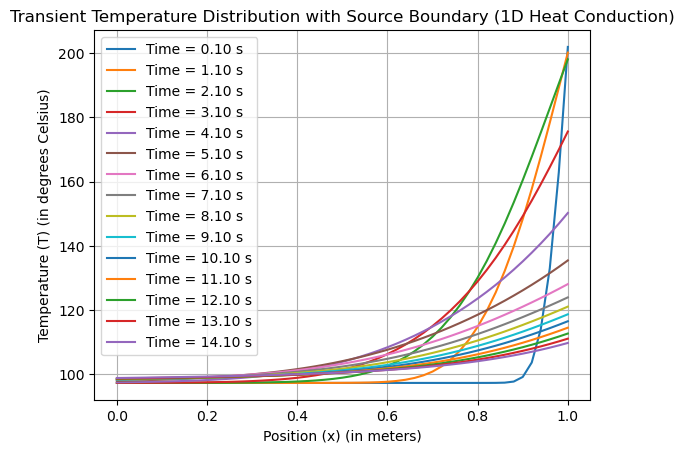

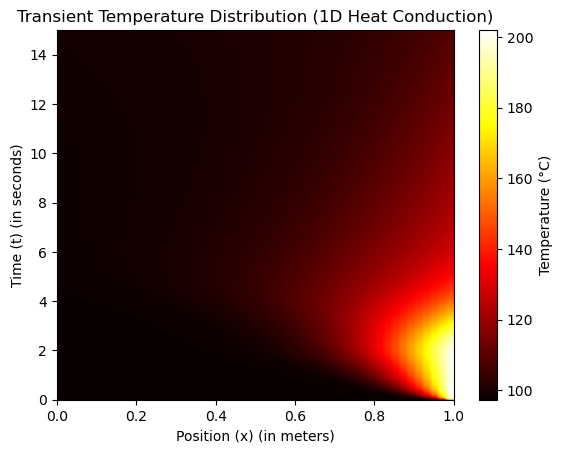

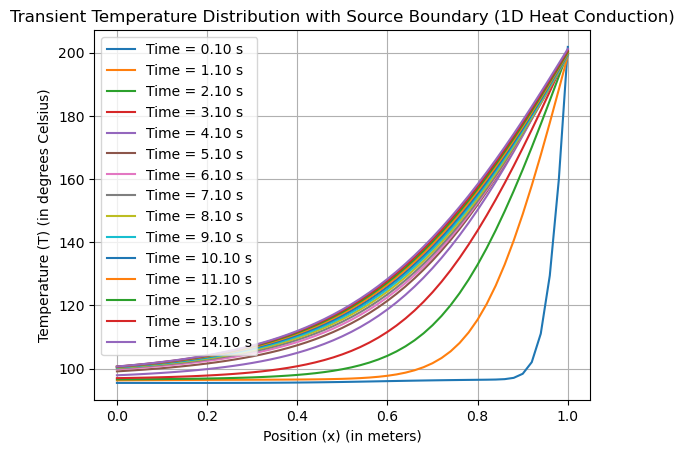

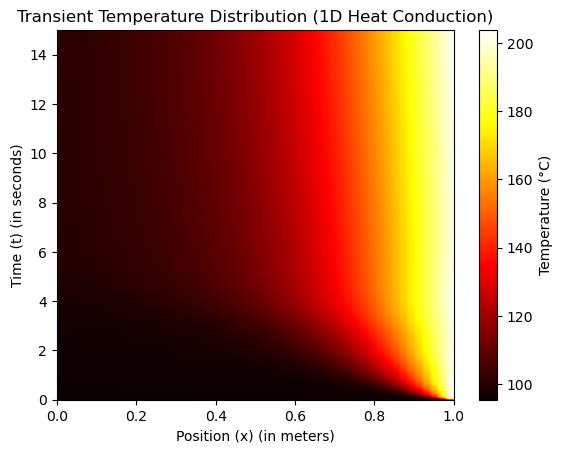

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
loaded_model2sec = load_model('1d_cond_pinn_2sec.h5')
loaded_model15sec = load_model('1d_cond_pinn_15sec.h5')
t_flat = np.linspace(0, t_max, 1500)
x_flat = np.linspace(0, L, 51)
#t, x = np.meshgrid(t_flat, x_flat)
x, t = np.meshgrid(x_flat, t_flat)
tx = np.stack([t.flatten(), x.flatten()], axis=-1)
u2 = loaded_model2sec.predict(tx, batch_size=1500*51)
u15 = loaded_model15sec.predict(tx, batch_size=1500*51)
#print(u.shape)
#print(t.shape)
#print(x.shape)
u2 = u2.reshape(t.shape)
u15 = u15.reshape(t.shape)

time_intervals_to_plot = np.arange(10, Nt, 100) #[0, 10, 20, 30, 40, 50, 60]
for n in time_intervals_to_plot:
    plt.plot(x_flat, u2[n], label=f'Time = {n * dt:.2f} s')

plt.xlabel('Position (x) (in meters)')
plt.ylabel('Temperature (T) (in degrees Celsius)')
plt.title('Transient Temperature Distribution with Source Boundary (1D Heat Conduction)')
plt.legend()
plt.grid()
plt.show()



plt.clf()
plt.imshow(u2, cmap='hot', extent=[0, L, 0, t_max], aspect='auto', origin='lower')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Position (x) (in meters)')
plt.ylabel('Time (t) (in seconds)')
plt.title('Transient Temperature Distribution (1D Heat Conduction)')
plt.show()

for n in time_intervals_to_plot:
    plt.plot(x_flat, u15[n], label=f'Time = {n * dt:.2f} s')

plt.xlabel('Position (x) (in meters)')
plt.ylabel('Temperature (T) (in degrees Celsius)')
plt.title('Transient Temperature Distribution with Source Boundary (1D Heat Conduction)')
plt.legend()
plt.grid()
plt.show()



plt.clf()
plt.imshow(u15, cmap='hot', extent=[0, L, 0, t_max], aspect='auto', origin='lower')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Position (x) (in meters)')
plt.ylabel('Time (t) (in seconds)')
plt.title('Transient Temperature Distribution (1D Heat Conduction)')
plt.show()

#print(u.shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056  

<Figure size 640x480 with 0 Axes>

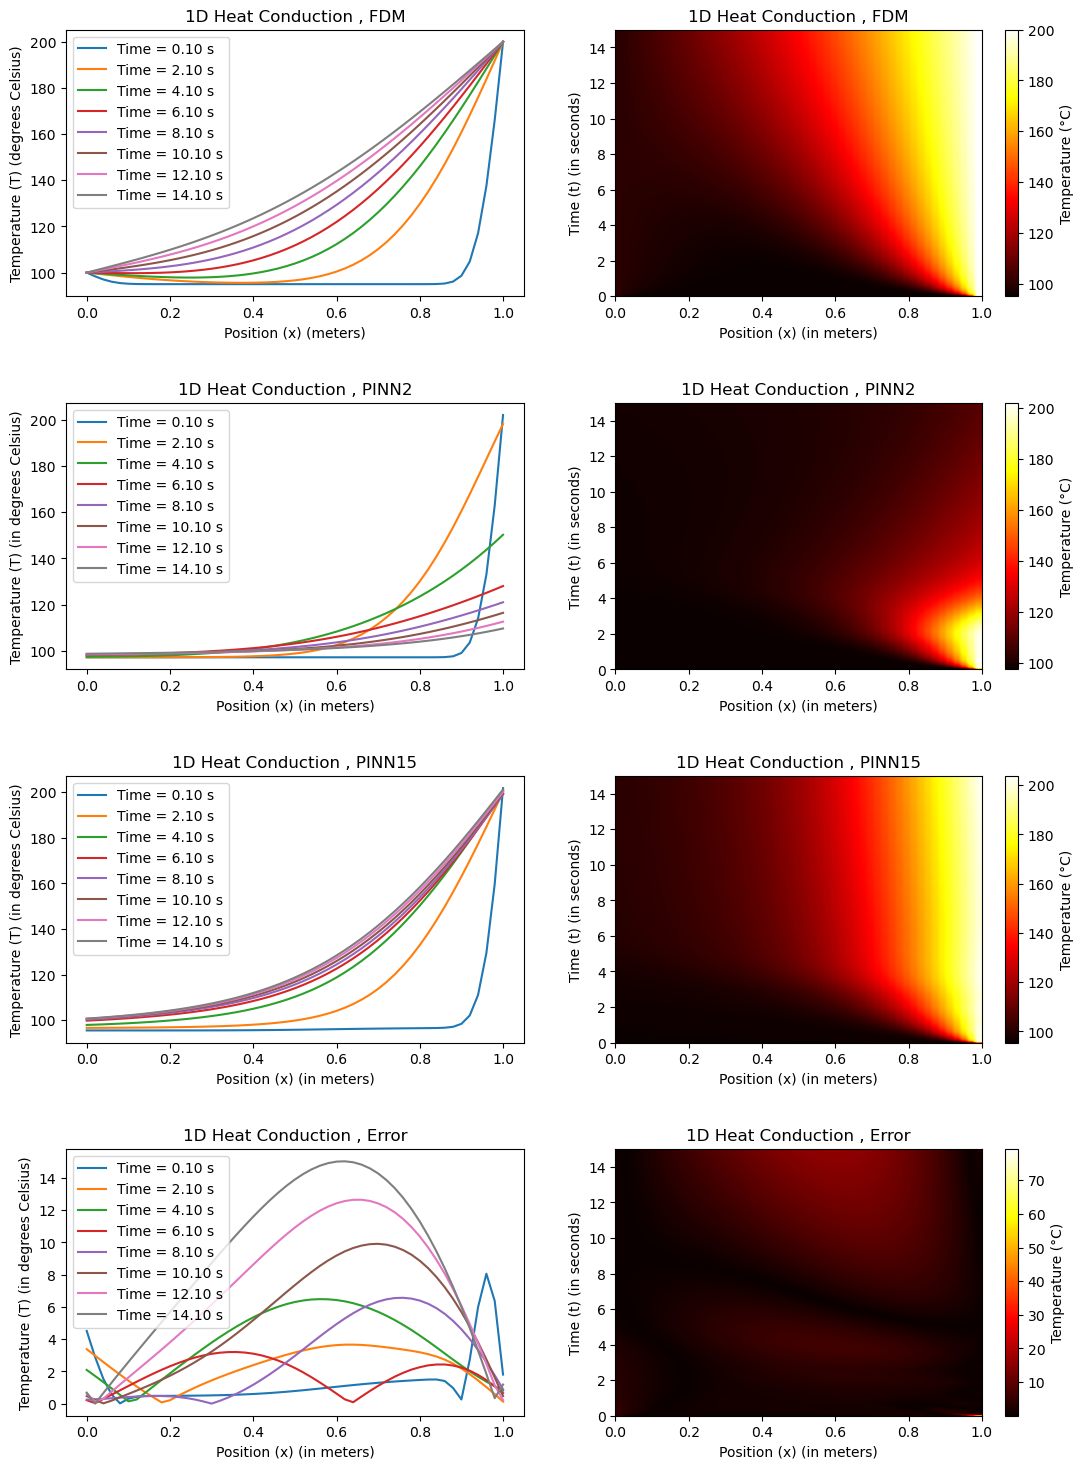

In [4]:
loaded_model2sec.summary()

x_fdm = np.linspace(0, L, Nx + 1)
plt.clf()
r= 4
c = 2

plt.figure(figsize=(13, 18))

plt.subplot(r, c, 1)

diff = 200

time_intervals_to_plot = np.arange(10, Nt, diff) #[0, 10, 20, 30, 40, 50, 60]
for n in time_intervals_to_plot:
    plt.plot(x_fdm, T_history_fdm[n], label=f'Time = {n * dt:.2f} s')

plt.xlabel('Position (x) (meters)')
plt.ylabel('Temperature (T) (degrees Celsius)')
plt.title('1D Heat Conduction , FDM')
plt.legend()
#plt.grid()
#plt.show()

plt.subplot(r, c, 2)

#plt.clf()
plt.imshow(T_history_fdm, cmap='hot', extent=[0, L, 0, t_max], aspect='auto', origin='lower')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Position (x) (in meters)')
plt.ylabel('Time (t) (in seconds)')
plt.title('1D Heat Conduction , FDM')
#plt.show()

#print(T_history_fdm.shape)

plt.subplot(r, c, 3)

time_intervals_to_plot = np.arange(10, Nt, diff) #[0, 10, 20, 30, 40, 50, 60]
for n in time_intervals_to_plot:
    plt.plot(x_flat, u2[n], label=f'Time = {n * dt:.2f} s')

plt.xlabel('Position (x) (in meters)')
plt.ylabel('Temperature (T) (in degrees Celsius)')
plt.title('1D Heat Conduction , PINN2')
plt.legend()
#plt.grid()
#plt.show()

plt.subplot(r, c, 4)


#plt.clf()
plt.imshow(u2, cmap='hot', extent=[0, L, 0, t_max], aspect='auto', origin='lower')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Position (x) (in meters)')
plt.ylabel('Time (t) (in seconds)')
plt.title('1D Heat Conduction , PINN2')

plt.subplot(r, c, 5)

time_intervals_to_plot = np.arange(10, Nt, diff) #[0, 10, 20, 30, 40, 50, 60]
for n in time_intervals_to_plot:
    plt.plot(x_flat, u15[n], label=f'Time = {n * dt:.2f} s')

plt.xlabel('Position (x) (in meters)')
plt.ylabel('Temperature (T) (in degrees Celsius)')
plt.title('1D Heat Conduction , PINN15')
plt.legend()
#plt.grid()
#plt.show()

plt.subplot(r, c, 6)


#plt.clf()
plt.imshow(u15, cmap='hot', extent=[0, L, 0, t_max], aspect='auto', origin='lower')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Position (x) (in meters)')
plt.ylabel('Time (t) (in seconds)')
plt.title('1D Heat Conduction , PINN15')

error = np.abs(u15-T_history_fdm)

plt.subplot(r, c, 7)

time_intervals_to_plot = np.arange(10, Nt, diff) #[0, 10, 20, 30, 40, 50, 60]
for n in time_intervals_to_plot:
    plt.plot(x_flat, error[n], label=f'Time = {n * dt:.2f} s')

plt.xlabel('Position (x) (in meters)')
plt.ylabel('Temperature (T) (in degrees Celsius)')
plt.title('1D Heat Conduction , Error')
plt.legend()
#plt.grid()
#plt.show()

plt.subplot(r, c, 8)


#plt.clf()
plt.imshow(error, cmap='hot', extent=[0, L, 0, t_max], aspect='auto', origin='lower')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Position (x) (in meters)')
plt.ylabel('Time (t) (in seconds)')
plt.title('1D Heat Conduction , Error')

#plt.tight_layout()
plt.subplots_adjust(hspace=0.4) 
plt.show()

#print(u.shape)
